In [1]:
import numpy as np
import pickle
import pandas as pd
from two_qubit_compiling import *
from plotnine import *

In [3]:
# Creates a look-up table for processing.

T = full_look_up_table(10)

In [79]:
# Creates a pandas dataframe as output of experiments for use in visualization

df = pd.DataFrame(columns=['input','baseline','method','output','percent improvement'])
counts = [100,150,200,250]
for c in counts:
    print(c)
    results = []
    for i in range(1):
        operation,sequence = random_operation(c)
        compiled,A = compile(operation)
        pre,A = preprocessing(operation)
        pre_post,A = postprocessing(pre,T,12)
        post_matrix,A = postprocessing(compiled,T,12)
        post_seq,A = postprocessing(sequence,T,12)
        results.append(['matrix',len(compiled),'pre',len(pre),1-len(pre)/len(compiled)])
        results.append(['matrix',len(compiled),'post',len(post_matrix),1-len(post_matrix)/len(compiled)])
        results.append(['matrix',len(compiled),'both',len(pre_post),1-len(pre_post)/len(compiled)])
        results.append(['sequence',c,'pre',len(pre),1-len(pre)/c])
        results.append(['sequence',c,'post',len(post_seq),1-len(post_seq)/c])
        results.append(['sequence',c,'both',len(pre_post),1-len(pre_post)/c])

    df = pd.DataFrame(results,columns=['input','baseline','method','output','percent improvement'])

500


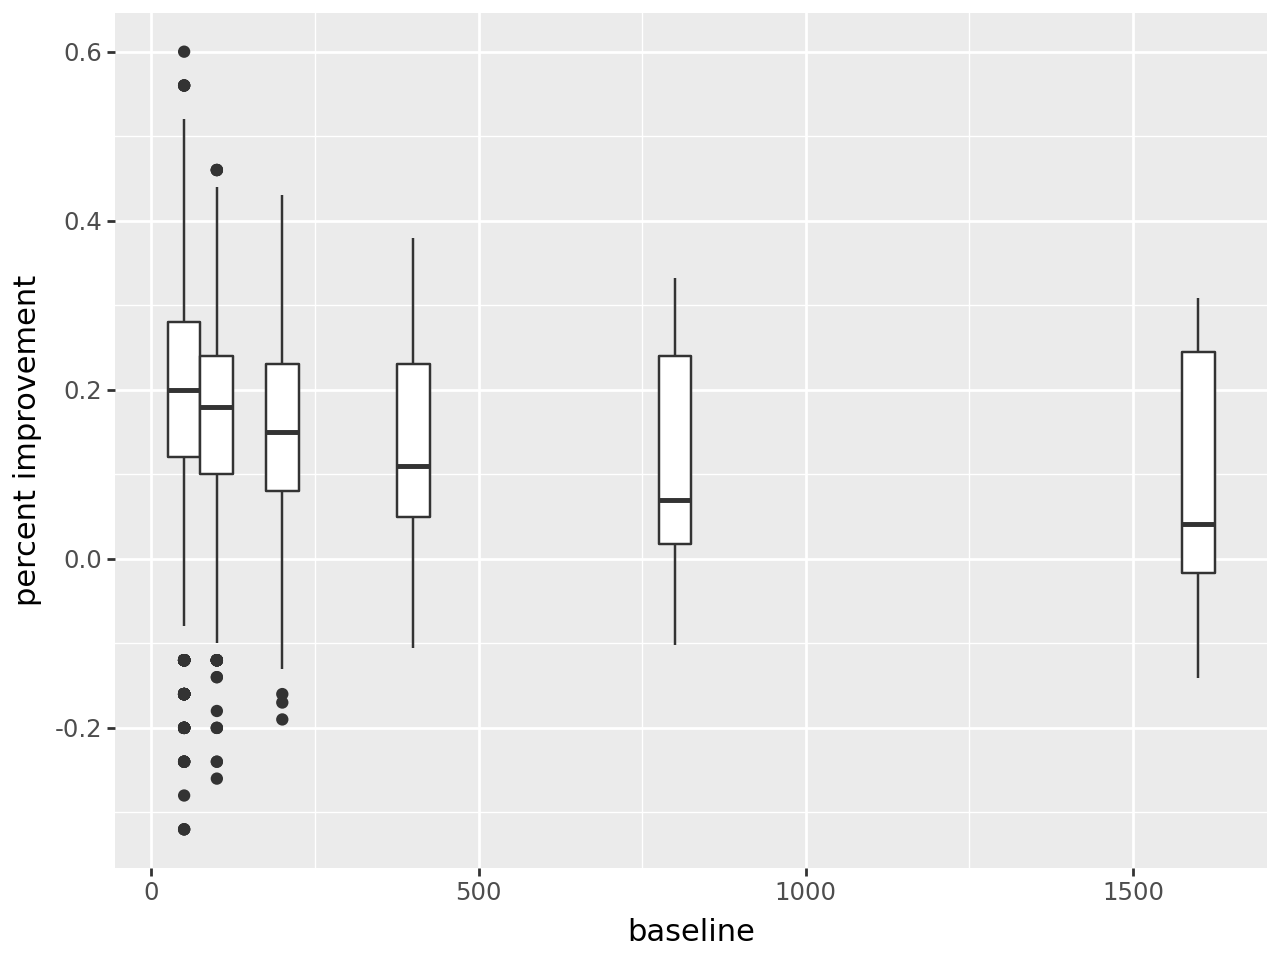

In [60]:
ggplot(df[df['input']=='sequence'],aes('baseline','percent improvement',group='baseline')) + geom_boxplot(width=50)